## 1. Importation des bibliothèques

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs, make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage
import warnings
warnings.filterwarnings('ignore')

# Configuration pour de beaux graphiques
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

## 2. Génération des jeux de données

Création de plusieurs datasets pour illustrer différents scénarios de clustering.

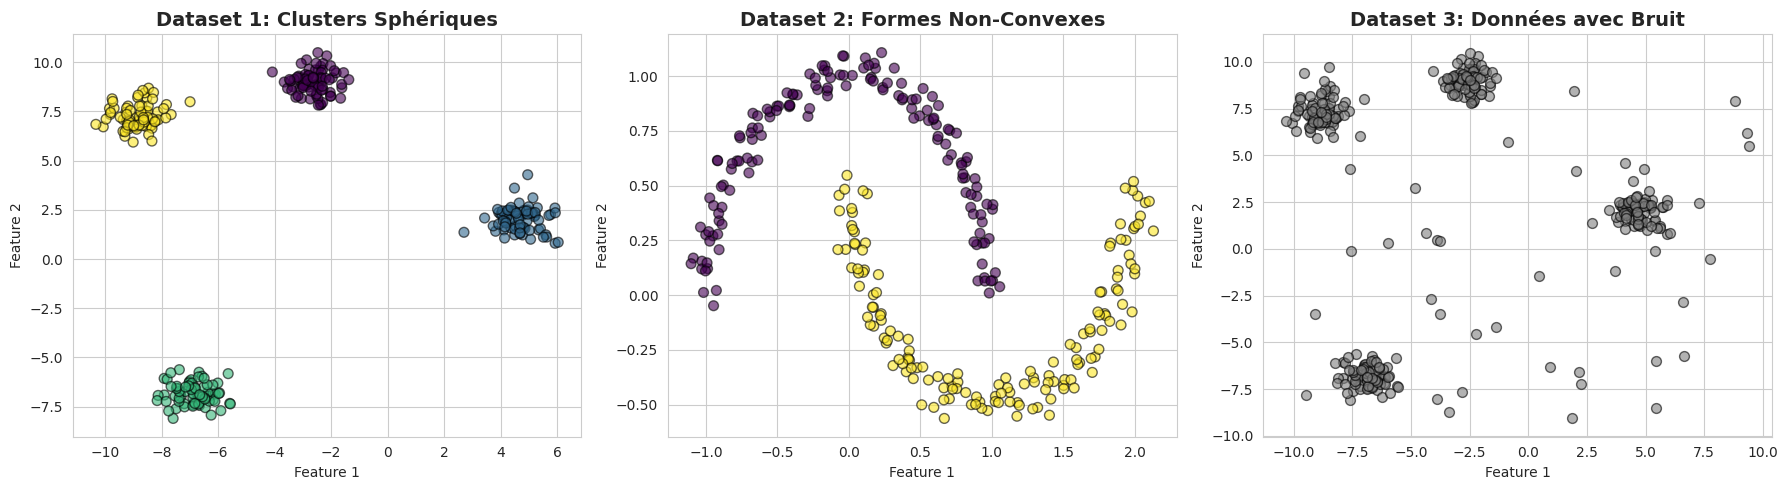

Dataset 1 (blobs): (300, 2)
Dataset 2 (moons): (300, 2)
Dataset 3 (noise): (350, 2)


In [27]:
# Dataset 1: Clusters bien séparés (idéal pour K-Means)
np.random.seed(42)
X_blobs, y_blobs = make_blobs(
    n_samples=300,
    n_features=2,
    centers=4,
    cluster_std=0.60,
    random_state=42
)

# Dataset 2: Formes non-convexes (idéal pour DBSCAN)
X_moons, y_moons = make_moons(
    n_samples=300,
    noise=0.05,
    random_state=42
)

# Dataset 3: Dataset avec bruit pour DBSCAN
X_noise = np.vstack([
    X_blobs,
    np.random.uniform(low=-10, high=10, size=(50, 2))
])

# Visualisation des datasets
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].scatter(X_blobs[:, 0], X_blobs[:, 1], c=y_blobs, cmap='viridis', s=50, alpha=0.6, edgecolors='k')
axes[0].set_title('Dataset 1: Clusters Sphériques', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')

axes[1].scatter(X_moons[:, 0], X_moons[:, 1], c=y_moons, cmap='viridis', s=50, alpha=0.6, edgecolors='k')
axes[1].set_title('Dataset 2: Formes Non-Convexes', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Feature 1')
axes[1].set_ylabel('Feature 2')

axes[2].scatter(X_noise[:, 0], X_noise[:, 1], s=50, alpha=0.6, edgecolors='k', c='gray')
axes[2].set_title('Dataset 3: Données avec Bruit', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Feature 1')
axes[2].set_ylabel('Feature 2')

plt.tight_layout()
plt.show()

print(f"Dataset 1 (blobs): {X_blobs.shape}")
print(f"Dataset 2 (moons): {X_moons.shape}")
print(f"Dataset 3 (noise): {X_noise.shape}")

## 3. K-Means Clustering

K-Means est un algorithme de partitionnement qui divise les données en K clusters.

### Principe :
1. Initialiser K centroïdes aléatoirement
2. Assigner chaque point au centroïde le plus proche
3. Recalculer les centroïdes comme moyenne des points assignés
4. Répéter jusqu'à convergence

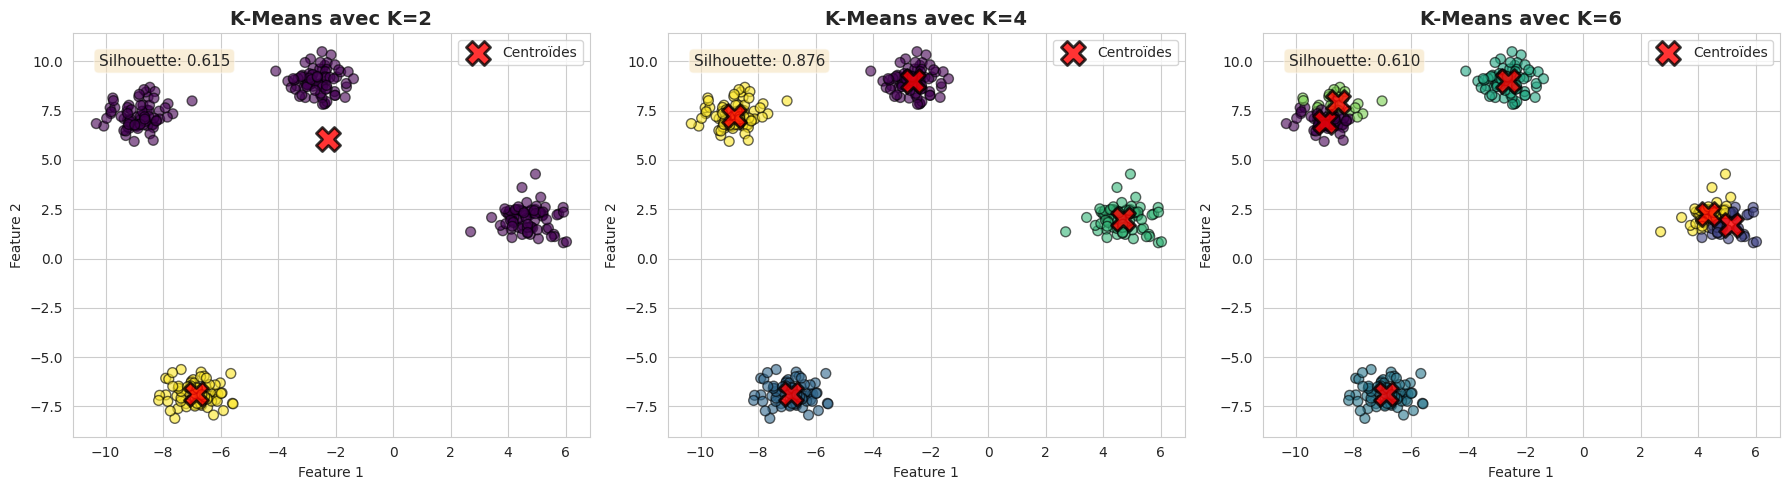

Inertie pour chaque K: ['2:9051.82', '4:203.89', '6:165.72']


In [28]:
# Application de K-Means avec différentes valeurs de K
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

k_values = [2, 4, 6]
inertias = []

for idx, k in enumerate(k_values):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_blobs)
    centroids = kmeans.cluster_centers_
    inertias.append(kmeans.inertia_)
    
    # Visualisation
    axes[idx].scatter(X_blobs[:, 0], X_blobs[:, 1], c=labels, cmap='viridis', 
                     s=50, alpha=0.6, edgecolors='k')
    axes[idx].scatter(centroids[:, 0], centroids[:, 1], c='red', s=300, 
                     alpha=0.8, marker='X', edgecolors='black', linewidths=2, label='Centroïdes')
    axes[idx].set_title(f'K-Means avec K={k}', fontsize=14, fontweight='bold')
    axes[idx].set_xlabel('Feature 1')
    axes[idx].set_ylabel('Feature 2')
    axes[idx].legend()
    
    # Calculer le score de silhouette
    if k > 1:
        silhouette = silhouette_score(X_blobs, labels)
        axes[idx].text(0.05, 0.95, f'Silhouette: {silhouette:.3f}', 
                      transform=axes[idx].transAxes, fontsize=11,
                      verticalalignment='top', bbox=dict(boxstyle='round', 
                      facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

print("Inertie pour chaque K:", [f"{k}:{inertia:.2f}" for k, inertia in zip(k_values, inertias)])

### Méthode du coude (Elbow Method)

Trouver le nombre optimal de clusters en analysant l'inertie.

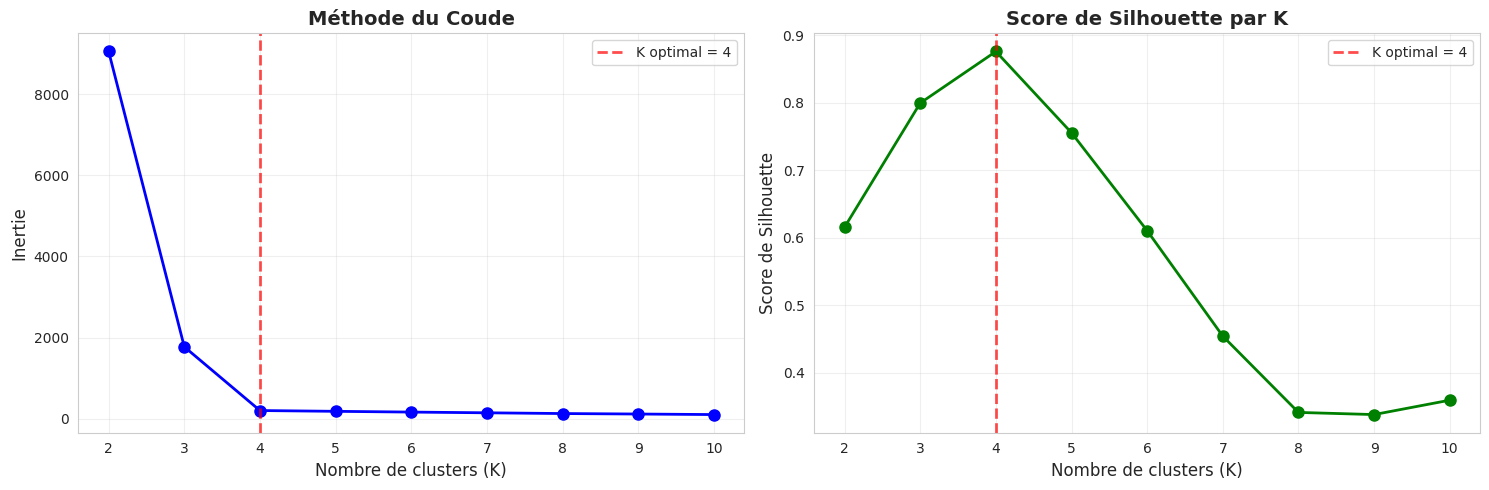

Nombre optimal de clusters (par silhouette): 4
Meilleur score de silhouette: 0.876


In [29]:
# Méthode du coude pour déterminer le nombre optimal de clusters
k_range = range(2, 11)
inertias = []
silhouette_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_blobs)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_blobs, labels))

# Visualisation
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Graphique du coude
axes[0].plot(k_range, inertias, 'bo-', linewidth=2, markersize=8)
axes[0].set_xlabel('Nombre de clusters (K)', fontsize=12)
axes[0].set_ylabel('Inertie', fontsize=12)
axes[0].set_title('Méthode du Coude', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)
axes[0].axvline(x=4, color='red', linestyle='--', linewidth=2, alpha=0.7, label='K optimal = 4')
axes[0].legend()

# Score de silhouette
axes[1].plot(k_range, silhouette_scores, 'go-', linewidth=2, markersize=8)
axes[1].set_xlabel('Nombre de clusters (K)', fontsize=12)
axes[1].set_ylabel('Score de Silhouette', fontsize=12)
axes[1].set_title('Score de Silhouette par K', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)
axes[1].axvline(x=4, color='red', linestyle='--', linewidth=2, alpha=0.7, label='K optimal = 4')
axes[1].legend()

plt.tight_layout()
plt.show()

optimal_k = k_range[np.argmax(silhouette_scores)]
print(f"Nombre optimal de clusters (par silhouette): {optimal_k}")
print(f"Meilleur score de silhouette: {max(silhouette_scores):.3f}")

## 4. Clustering Hiérarchique

Le clustering hiérarchique crée une hiérarchie de clusters via des fusions successives.

### Types de linkage :
- **Ward** : Minimise la variance intra-cluster
- **Complete** : Distance maximale entre clusters
- **Average** : Distance moyenne entre clusters
- **Single** : Distance minimale entre clusters

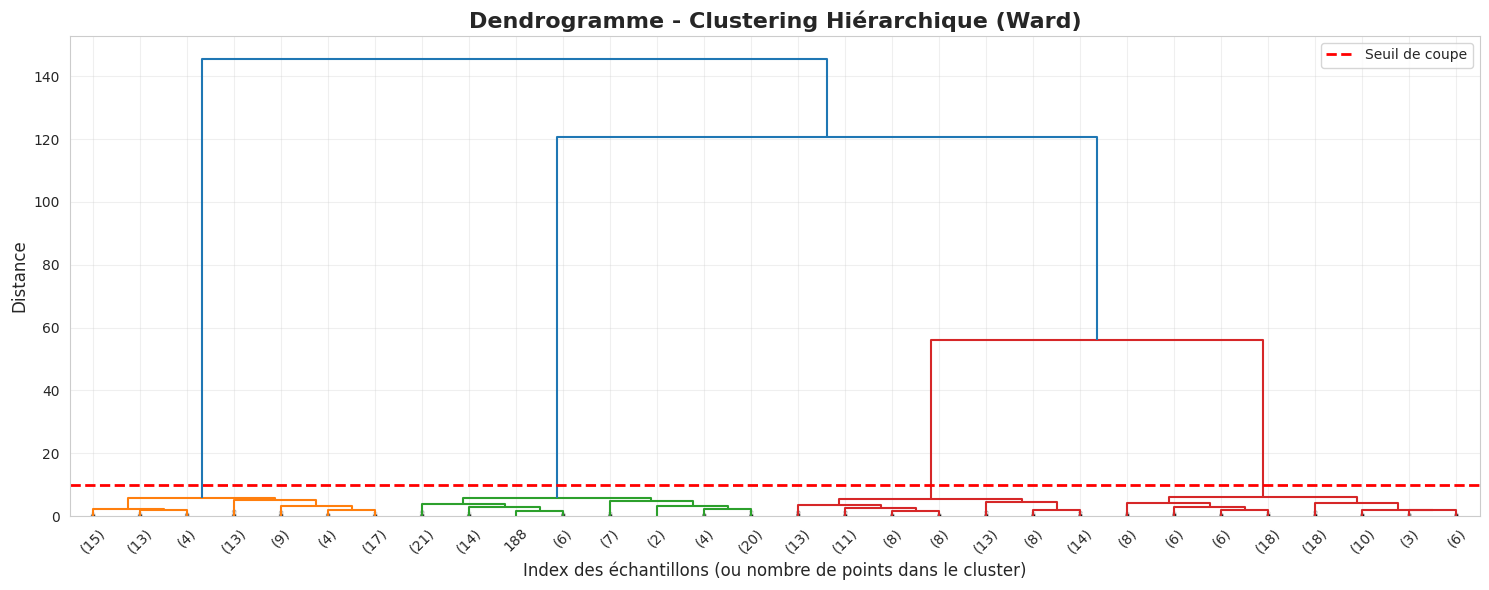

Le dendrogramme montre la hiérarchie des fusions de clusters
La hauteur représente la distance entre les clusters fusionnés


In [30]:
# Création du dendrogramme
plt.figure(figsize=(15, 6))

# Calcul de la matrice de linkage
linkage_matrix = linkage(X_blobs, method='ward')

# Affichage du dendrogramme
dendrogram(linkage_matrix, 
           truncate_mode='lastp',
           p=30,
           leaf_font_size=10,
           show_contracted=True)

plt.title('Dendrogramme - Clustering Hiérarchique (Ward)', fontsize=16, fontweight='bold')
plt.xlabel('Index des échantillons (ou nombre de points dans le cluster)', fontsize=12)
plt.ylabel('Distance', fontsize=12)
plt.axhline(y=10, color='red', linestyle='--', linewidth=2, label='Seuil de coupe')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Le dendrogramme montre la hiérarchie des fusions de clusters")
print("La hauteur représente la distance entre les clusters fusionnés")

## 5. DBSCAN (Density-Based Spatial Clustering)

DBSCAN identifie les clusters basés sur la densité des points et peut détecter le bruit.

### Paramètres :
- **eps** : Rayon de voisinage
- **min_samples** : Nombre minimum de points pour former un cluster dense

### Avantages :
- Détecte les formes arbitraires
- Identifie les points de bruit (outliers)
- Pas besoin de spécifier le nombre de clusters

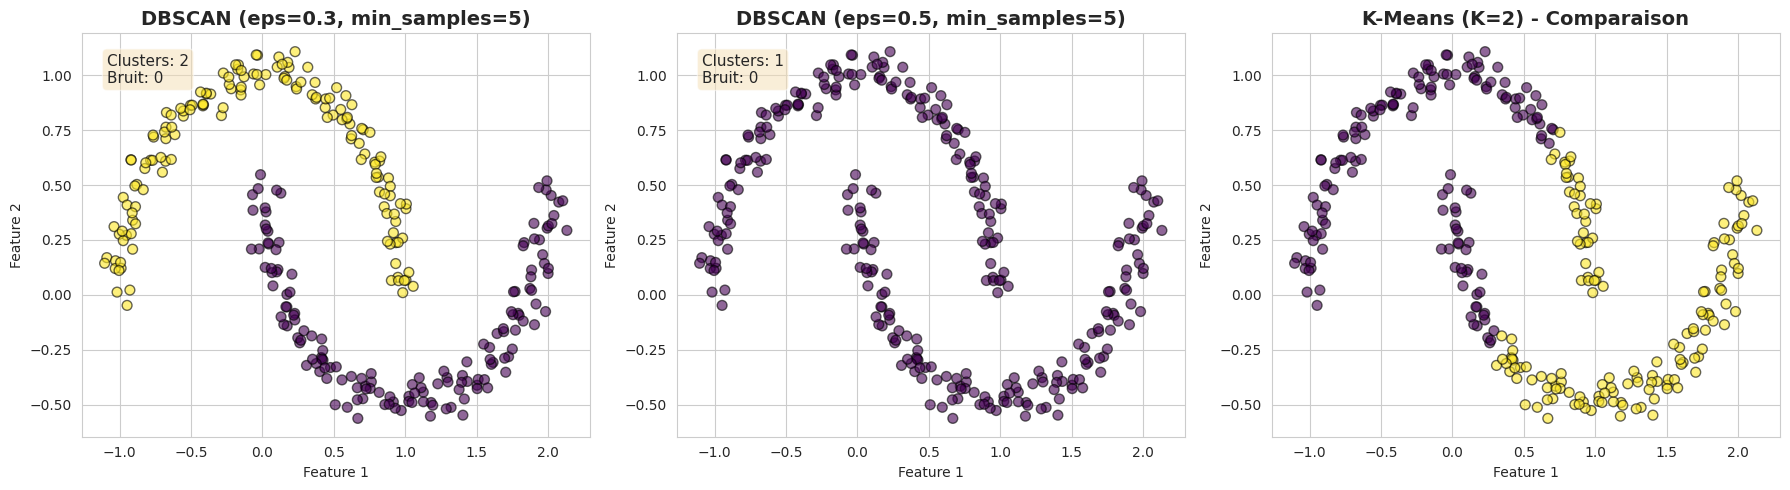

DBSCAN détecte correctement les formes non-convexes contrairement à K-Means


In [31]:
# DBSCAN sur le dataset avec formes non-convexes
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Configuration 1: eps=0.3
dbscan1 = DBSCAN(eps=0.3, min_samples=5)
labels1 = dbscan1.fit_predict(X_moons)

axes[0].scatter(X_moons[:, 0], X_moons[:, 1], c=labels1, cmap='viridis', 
               s=50, alpha=0.6, edgecolors='k')
axes[0].set_title('DBSCAN (eps=0.3, min_samples=5)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')
n_clusters1 = len(set(labels1)) - (1 if -1 in labels1 else 0)
n_noise1 = list(labels1).count(-1)
axes[0].text(0.05, 0.95, f'Clusters: {n_clusters1}\nBruit: {n_noise1}', 
            transform=axes[0].transAxes, fontsize=11,
            verticalalignment='top', bbox=dict(boxstyle='round', 
            facecolor='wheat', alpha=0.5))

# Configuration 2: eps=0.5
dbscan2 = DBSCAN(eps=0.5, min_samples=5)
labels2 = dbscan2.fit_predict(X_moons)

axes[1].scatter(X_moons[:, 0], X_moons[:, 1], c=labels2, cmap='viridis', 
               s=50, alpha=0.6, edgecolors='k')
axes[1].set_title('DBSCAN (eps=0.5, min_samples=5)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Feature 1')
axes[1].set_ylabel('Feature 2')
n_clusters2 = len(set(labels2)) - (1 if -1 in labels2 else 0)
n_noise2 = list(labels2).count(-1)
axes[1].text(0.05, 0.95, f'Clusters: {n_clusters2}\nBruit: {n_noise2}', 
            transform=axes[1].transAxes, fontsize=11,
            verticalalignment='top', bbox=dict(boxstyle='round', 
            facecolor='wheat', alpha=0.5))

# Configuration 3: K-Means pour comparaison
kmeans_moons = KMeans(n_clusters=2, random_state=42, n_init=10)
labels_kmeans = kmeans_moons.fit_predict(X_moons)

axes[2].scatter(X_moons[:, 0], X_moons[:, 1], c=labels_kmeans, cmap='viridis', 
               s=50, alpha=0.6, edgecolors='k')
axes[2].set_title('K-Means (K=2) - Comparaison', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Feature 1')
axes[2].set_ylabel('Feature 2')

plt.tight_layout()
plt.show()

print("DBSCAN détecte correctement les formes non-convexes contrairement à K-Means")

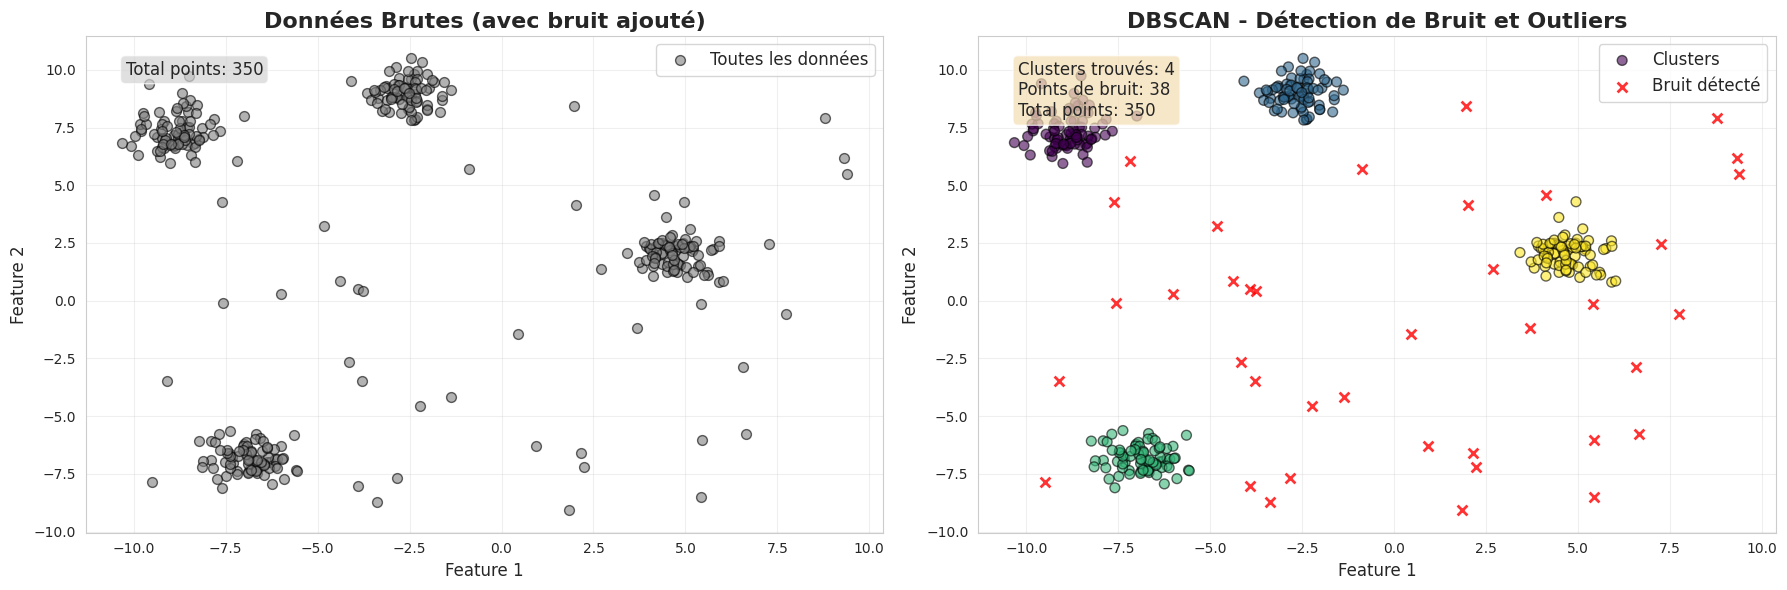

DBSCAN a identifié 38 points de bruit sur 350 points
Pourcentage de bruit: 10.9%


In [32]:
# DBSCAN sur le dataset avec bruit
dbscan_noise = DBSCAN(eps=1.0, min_samples=5)
labels_noise = dbscan_noise.fit_predict(X_noise)

# Visualisation côte à côte
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Graphique 1: Données brutes avec bruit
axes[0].scatter(X_noise[:, 0], X_noise[:, 1], s=50, alpha=0.6, 
               edgecolors='k', c='gray', label='Toutes les données')
axes[0].set_title('Données Brutes (avec bruit ajouté)', fontsize=16, fontweight='bold')
axes[0].set_xlabel('Feature 1', fontsize=12)
axes[0].set_ylabel('Feature 2', fontsize=12)
axes[0].legend(fontsize=12)
axes[0].grid(True, alpha=0.3)
axes[0].text(0.05, 0.95, f'Total points: {len(X_noise)}', 
            transform=axes[0].transAxes, fontsize=12,
            verticalalignment='top', bbox=dict(boxstyle='round', 
            facecolor='lightgray', alpha=0.7))

# Graphique 2: DBSCAN avec détection de bruit
mask_noise = labels_noise == -1
mask_clusters = labels_noise != -1

axes[1].scatter(X_noise[mask_clusters, 0], X_noise[mask_clusters, 1], 
               c=labels_noise[mask_clusters], cmap='viridis', 
               s=50, alpha=0.6, edgecolors='k', label='Clusters')
axes[1].scatter(X_noise[mask_noise, 0], X_noise[mask_noise, 1], 
               c='red', s=50, alpha=0.8, marker='x', linewidths=2, label='Bruit détecté')

axes[1].set_title('DBSCAN - Détection de Bruit et Outliers', fontsize=16, fontweight='bold')
axes[1].set_xlabel('Feature 1', fontsize=12)
axes[1].set_ylabel('Feature 2', fontsize=12)
axes[1].legend(fontsize=12)
axes[1].grid(True, alpha=0.3)

n_clusters_noise = len(set(labels_noise)) - (1 if -1 in labels_noise else 0)
n_noise_points = list(labels_noise).count(-1)

axes[1].text(0.05, 0.95, f'Clusters trouvés: {n_clusters_noise}\nPoints de bruit: {n_noise_points}\nTotal points: {len(X_noise)}', 
            transform=axes[1].transAxes, fontsize=12,
            verticalalignment='top', bbox=dict(boxstyle='round', 
            facecolor='wheat', alpha=0.7))

plt.tight_layout()
plt.show()

print(f"DBSCAN a identifié {n_noise_points} points de bruit sur {len(X_noise)} points")
print(f"Pourcentage de bruit: {n_noise_points/len(X_noise)*100:.1f}%")

## 6. PCA (Principal Component Analysis)

PCA est une technique de réduction de dimensionnalité qui projette les données sur les axes de variance maximale.

### Objectifs :
- Réduire la dimensionnalité
- Éliminer la redondance
- Faciliter la visualisation
- Accélérer les algorithmes

Dataset original: (1797, 64)
Nombre de classes: 10
Dimensions: 64


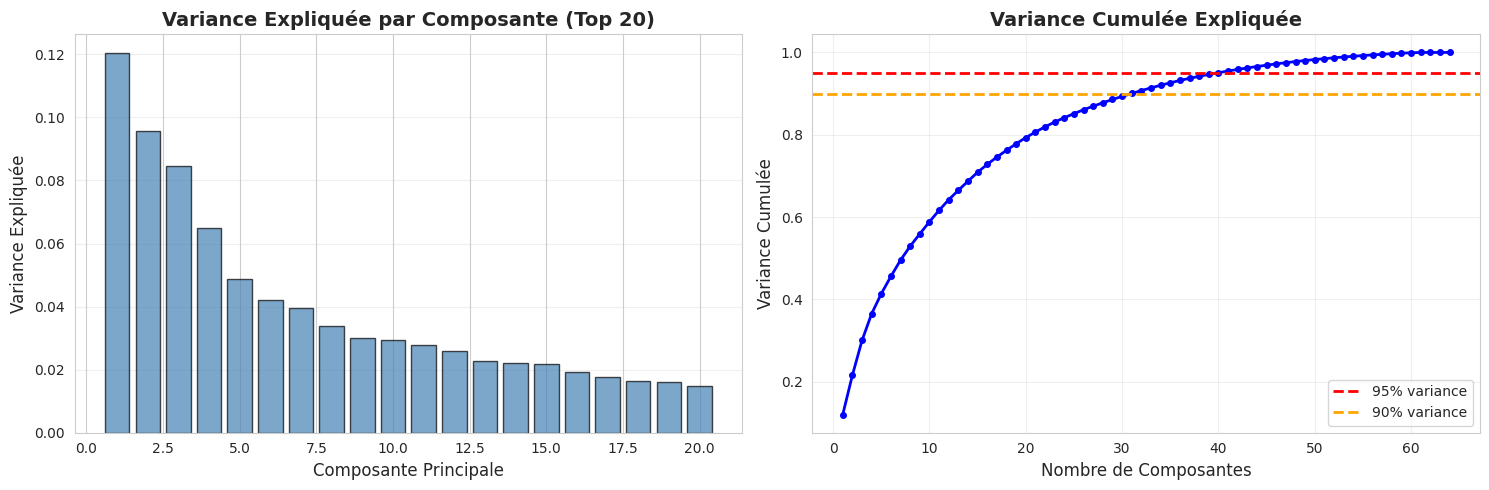


Nombre de composantes pour 95% de variance: 40
Réduction de dimensionnalité: 64 → 40
Taux de compression: 37.5%


In [33]:
# Génération d'un dataset avec plus de dimensions
from sklearn.datasets import load_digits

# Charger le dataset de chiffres (64 dimensions)
digits = load_digits()
X_digits = digits.data
y_digits = digits.target

print(f"Dataset original: {X_digits.shape}")
print(f"Nombre de classes: {len(np.unique(y_digits))}")
print(f"Dimensions: {X_digits.shape[1]}")

# Normalisation
scaler = StandardScaler()
X_digits_scaled = scaler.fit_transform(X_digits)

# Application de PCA
pca = PCA()
X_pca = pca.fit_transform(X_digits_scaled)

# Variance expliquée
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Visualisation de la variance expliquée
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Variance expliquée par composante
axes[0].bar(range(1, len(pca.explained_variance_ratio_[:20]) + 1), 
           pca.explained_variance_ratio_[:20], alpha=0.7, color='steelblue', edgecolor='black')
axes[0].set_xlabel('Composante Principale', fontsize=12)
axes[0].set_ylabel('Variance Expliquée', fontsize=12)
axes[0].set_title('Variance Expliquée par Composante (Top 20)', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='y')

# Variance cumulée
axes[1].plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 
            'b-o', linewidth=2, markersize=4)
axes[1].axhline(y=0.95, color='red', linestyle='--', linewidth=2, label='95% variance')
axes[1].axhline(y=0.90, color='orange', linestyle='--', linewidth=2, label='90% variance')
axes[1].set_xlabel('Nombre de Composantes', fontsize=12)
axes[1].set_ylabel('Variance Cumulée', fontsize=12)
axes[1].set_title('Variance Cumulée Expliquée', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Trouver le nombre de composantes pour 95% de variance
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
print(f"\nNombre de composantes pour 95% de variance: {n_components_95}")
print(f"Réduction de dimensionnalité: {X_digits.shape[1]} → {n_components_95}")
print(f"Taux de compression: {(1 - n_components_95/X_digits.shape[1])*100:.1f}%")

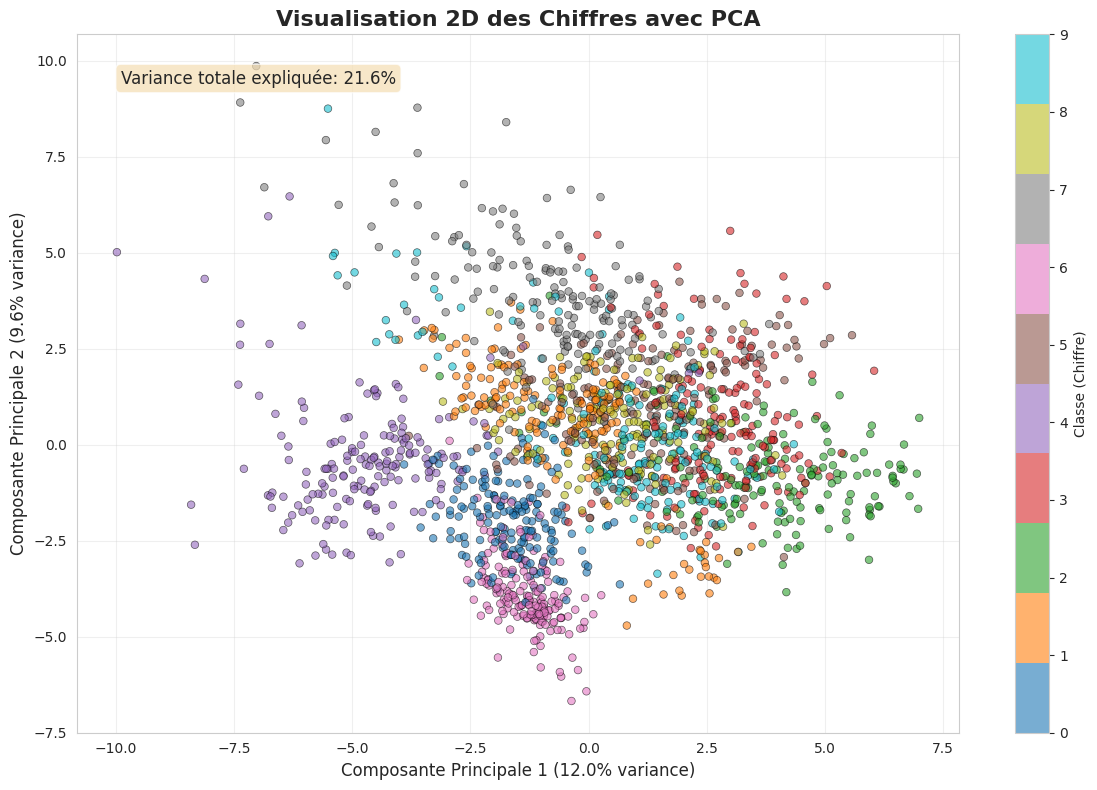

Avec seulement 2 composantes, on conserve 21.6% de l'information


In [34]:
# Visualisation en 2D avec PCA
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_digits_scaled)

# Visualisation
plt.figure(figsize=(12, 8))

scatter = plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=y_digits, 
                     cmap='tab10', s=30, alpha=0.6, edgecolors='k', linewidth=0.5)

plt.colorbar(scatter, label='Classe (Chiffre)')
plt.xlabel(f'Composante Principale 1 ({pca_2d.explained_variance_ratio_[0]*100:.1f}% variance)', fontsize=12)
plt.ylabel(f'Composante Principale 2 ({pca_2d.explained_variance_ratio_[1]*100:.1f}% variance)', fontsize=12)
plt.title('Visualisation 2D des Chiffres avec PCA', fontsize=16, fontweight='bold')
plt.grid(True, alpha=0.3)

variance_2d = sum(pca_2d.explained_variance_ratio_)
plt.text(0.05, 0.95, f'Variance totale expliquée: {variance_2d*100:.1f}%', 
        transform=plt.gca().transAxes, fontsize=12,
        verticalalignment='top', bbox=dict(boxstyle='round', 
        facecolor='wheat', alpha=0.7))

plt.tight_layout()
plt.show()

print(f"Avec seulement 2 composantes, on conserve {variance_2d*100:.1f}% de l'information")

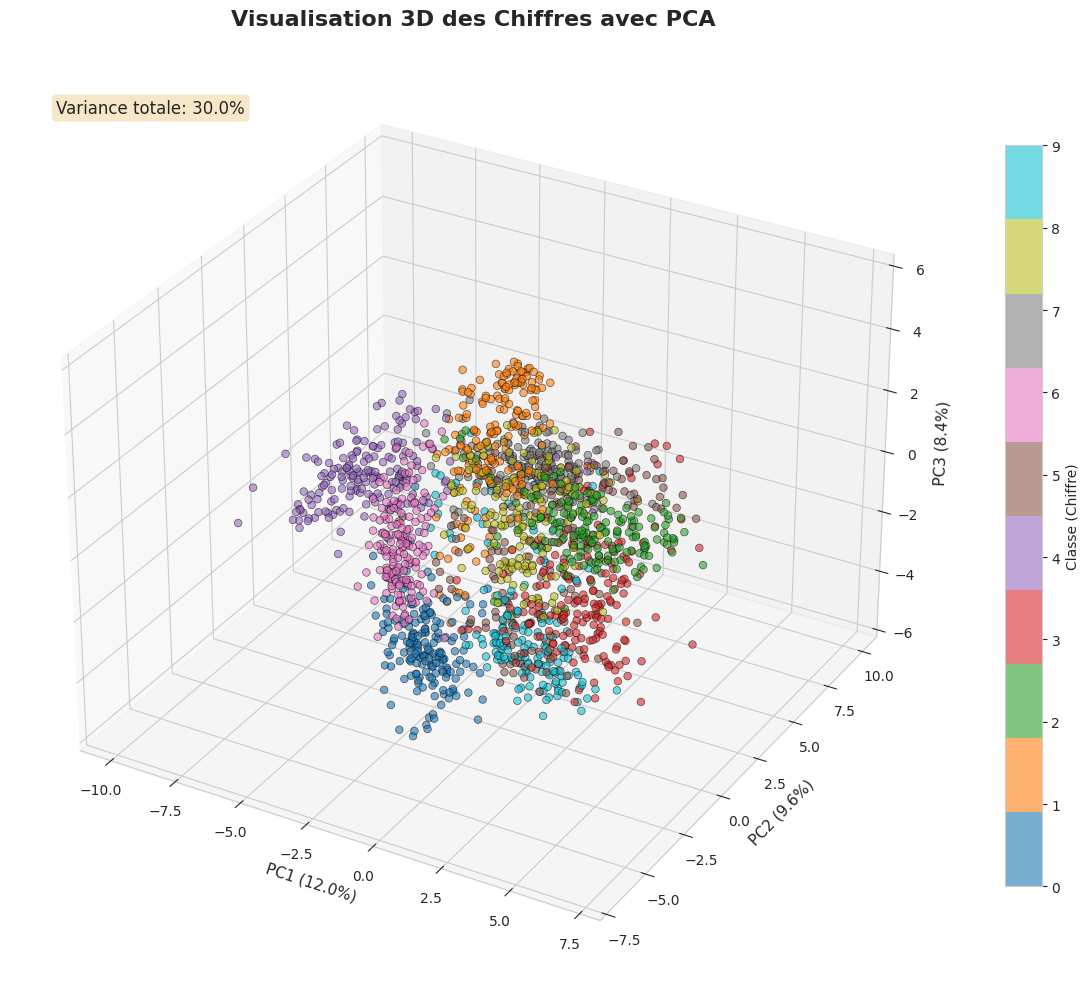

Avec 3 composantes, on conserve 30.0% de l'information


In [35]:
# Visualisation en 3D avec PCA
from mpl_toolkits.mplot3d import Axes3D

pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_digits_scaled)

fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], 
                    c=y_digits, cmap='tab10', s=30, alpha=0.6, edgecolors='k', linewidth=0.5)

ax.set_xlabel(f'PC1 ({pca_3d.explained_variance_ratio_[0]*100:.1f}%)', fontsize=11)
ax.set_ylabel(f'PC2 ({pca_3d.explained_variance_ratio_[1]*100:.1f}%)', fontsize=11)
ax.set_zlabel(f'PC3 ({pca_3d.explained_variance_ratio_[2]*100:.1f}%)', fontsize=11)
ax.set_title('Visualisation 3D des Chiffres avec PCA', fontsize=16, fontweight='bold', pad=20)

plt.colorbar(scatter, label='Classe (Chiffre)', shrink=0.8)

variance_3d = sum(pca_3d.explained_variance_ratio_)
ax.text2D(0.05, 0.95, f'Variance totale: {variance_3d*100:.1f}%', 
         transform=ax.transAxes, fontsize=12,
         verticalalignment='top', bbox=dict(boxstyle='round', 
         facecolor='wheat', alpha=0.7))

plt.tight_layout()
plt.show()

print(f"Avec 3 composantes, on conserve {variance_3d*100:.1f}% de l'information")

## 7. Application PCA + Clustering

Combinaison de PCA pour réduire la dimensionnalité et K-Means pour le clustering.

Dimensions après PCA: (1797, 10)
Variance conservée: 58.9%


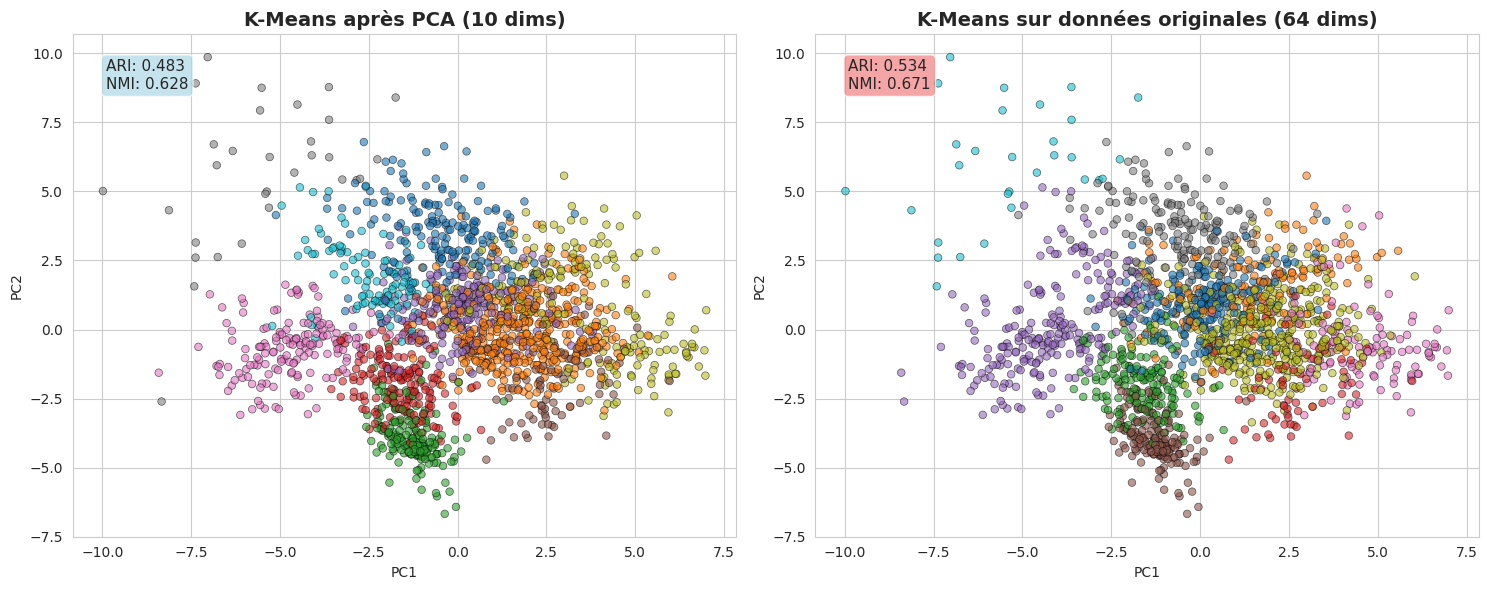


COMPARAISON PCA + K-Means vs K-Means
Adjusted Rand Index (ARI):
  - Avec PCA: 0.483
  - Sans PCA: 0.534

Normalized Mutual Information (NMI):
  - Avec PCA: 0.628
  - Sans PCA: 0.671

PCA permet de réduire le temps de calcul tout en conservant les performances!


In [36]:
# Réduire à 10 dimensions avec PCA puis appliquer K-Means
pca_reduced = PCA(n_components=10)
X_reduced = pca_reduced.fit_transform(X_digits_scaled)

print(f"Dimensions après PCA: {X_reduced.shape}")
print(f"Variance conservée: {sum(pca_reduced.explained_variance_ratio_)*100:.1f}%")

# K-Means sur les données réduites
kmeans_pca = KMeans(n_clusters=10, random_state=42, n_init=10)
labels_pca = kmeans_pca.fit_predict(X_reduced)

# K-Means sur les données originales (pour comparaison)
kmeans_original = KMeans(n_clusters=10, random_state=42, n_init=10)
labels_original = kmeans_original.fit_predict(X_digits_scaled)

# Comparaison des performances
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

ari_pca = adjusted_rand_score(y_digits, labels_pca)
ari_original = adjusted_rand_score(y_digits, labels_original)

nmi_pca = normalized_mutual_info_score(y_digits, labels_pca)
nmi_original = normalized_mutual_info_score(y_digits, labels_original)

# Visualisation des résultats
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Avec PCA
axes[0].scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=labels_pca, 
               cmap='tab10', s=30, alpha=0.6, edgecolors='k', linewidth=0.5)
axes[0].set_title('K-Means après PCA (10 dims)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('PC1')
axes[0].set_ylabel('PC2')
axes[0].text(0.05, 0.95, f'ARI: {ari_pca:.3f}\nNMI: {nmi_pca:.3f}', 
            transform=axes[0].transAxes, fontsize=11,
            verticalalignment='top', bbox=dict(boxstyle='round', 
            facecolor='lightblue', alpha=0.7))

# Sans PCA
axes[1].scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=labels_original, 
               cmap='tab10', s=30, alpha=0.6, edgecolors='k', linewidth=0.5)
axes[1].set_title('K-Means sur données originales (64 dims)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].text(0.05, 0.95, f'ARI: {ari_original:.3f}\nNMI: {nmi_original:.3f}', 
            transform=axes[1].transAxes, fontsize=11,
            verticalalignment='top', bbox=dict(boxstyle='round', 
            facecolor='lightcoral', alpha=0.7))

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("COMPARAISON PCA + K-Means vs K-Means")
print("="*60)
print(f"Adjusted Rand Index (ARI):")
print(f"  - Avec PCA: {ari_pca:.3f}")
print(f"  - Sans PCA: {ari_original:.3f}")
print(f"\nNormalized Mutual Information (NMI):")
print(f"  - Avec PCA: {nmi_pca:.3f}")
print(f"  - Sans PCA: {nmi_original:.3f}")
print("\nPCA permet de réduire le temps de calcul tout en conservant les performances!")
print("="*60)